In [3]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import scipy as sp
import scipy.linalg
import sympy as sy
sy.init_printing() 
import warnings
warnings.filterwarnings("ignore")

# <font face="gotham" color="purple"> $\mathbb{R}^n$ and Vectors
    

Every vector in vector space has length unless it is $0$-vector, and the length is called <font face="gotham" color="red"> norm </font>, the general formula of norm of a vector in $\mathbb{R}^k$is 

$$
\|u\|= \sqrt{x_1^2+x_2^2+...+x_k^2}
$$

Now let's plot vectors $(4, 7)$ and $(8, 6)$ in $\mathbb{R}^2$.

<IPython.core.display.Javascript object>


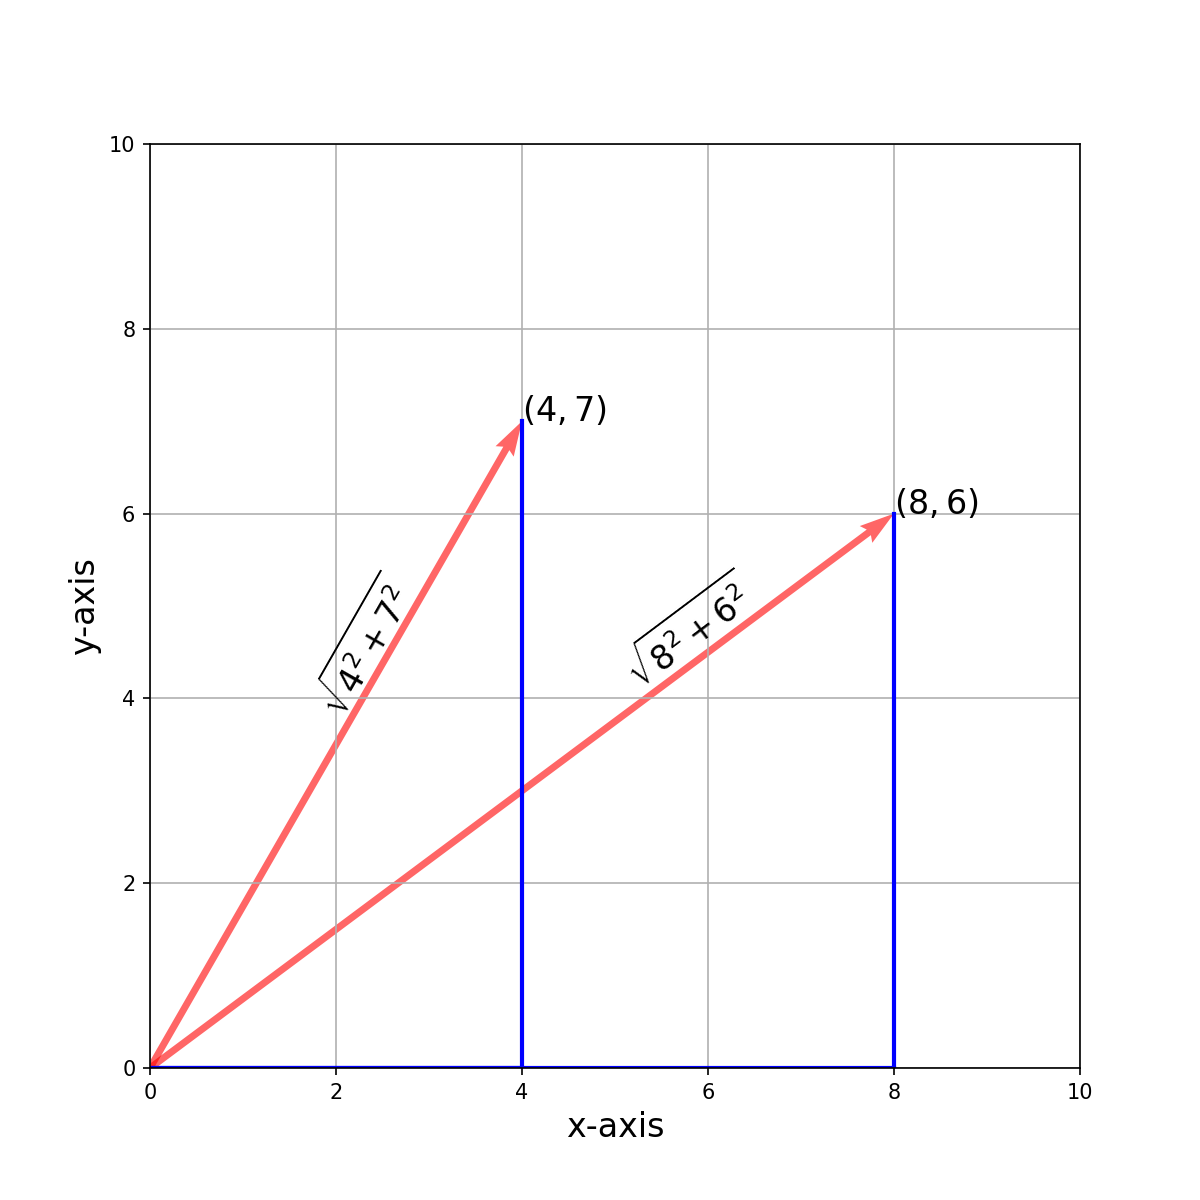

In [2]:
%matplotlib notebook
fig, ax = plt.subplots(figsize=(8, 8))
vec = np.array([[0, 0, 4, 7], [0, 0, 8, 6]])

X, Y, U, V = zip(*vec)
ax.quiver(X, Y, U, V, angles='xy', scale_units='xy', scale=1, color = 'red', alpha = .6)
ax.set_xlim([0, 10])
ax.set_ylim([0, 10])
ax.set_xlabel('x-axis', fontsize =16)
ax.set_ylabel('y-axis', fontsize =16)
ax.grid()
ax.text(4, 7, '$(4, 7)$', fontsize = 16)
ax.text(8, 6, '$(8, 6)$', fontsize = 16)

ax.plot([4, 4], [0, 7], c = 'b', lw = 2)
ax.plot([0, 4], [0, 0], c= 'b', lw = 2)

ax.plot([8, 0], [0, 0], c = 'b', lw = 2)
ax.plot([8, 8], [0,6], c= 'b', lw = 2)

ax.text(1.7, 3.8, '$\sqrt{4^2+7^2}$', fontsize = 16, rotation = np.arctan(7/4)*180/np.pi)
ax.text(5, 4.1, '$\sqrt{8^2+6^2}$', fontsize = 16, rotation = np.arctan(6/8)*180/np.pi ) 
# use arctan to get the rotation degree and convert from radian to degrees
plt.show()

There is a NumPy function for computing norms: ```np.linalg.norm()```.

In [3]:
a = np.array([4, 7])
b = np.array([8, 6])
a_norm = np.linalg.norm(a)
b_norm = np.linalg.norm(b)
print('Norm of a and b are {0:.4f}, {1} respectively.'.format(a_norm, b_norm))

Norm of a and b are 8.0623, 10.0 respectively.


Let's try three vectors $(1, 1, 1)$, $(-2, 2, 5)$, $(3, -2, 1)$ in $\mathbb{R}^3$, however keep in mind that matplotlib does not have 3D engine, it is simulated by 2D projection.

<IPython.core.display.Javascript object>


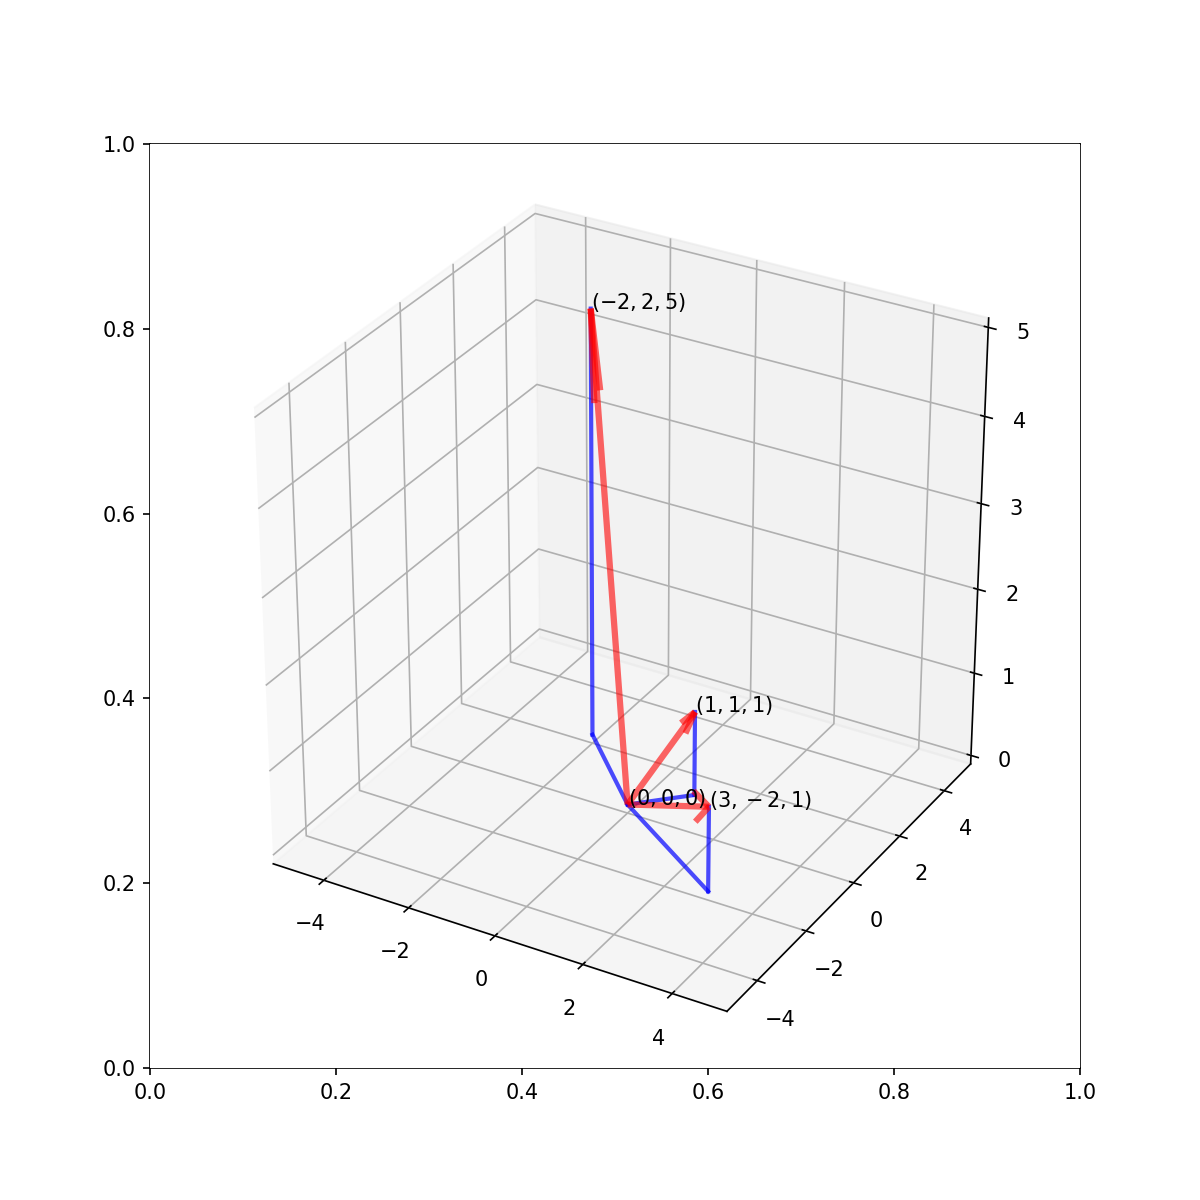

In [6]:
%matplotlib notebook
vec = np.array([[0, 0, 0, 1, 1, 1], 
                [0, 0, 0, -2, 2, 5], 
                [0, 0, 0, 3, -2, 1]])
X, Y, Z, U, V, W = zip(*vec)

fig, ax = plt.subplots(figsize = (8, 8))
ax = fig.gca(projection='3d')
ax.quiver(X, Y, Z, U, V, W, length=1, normalize=False, color = 'red', alpha = .6,arrow_length_ratio = .18, pivot = 'tail',
          linestyles = 'solid',linewidths = 3)
ax.grid()
ax.set_xlim([-5, 5])
ax.set_ylim([-5, 5])
ax.set_zlim([0, 5])

ax.text(1, 1, 1, '$(1, 1, 1)$')
ax.text(-2, 2, 5, '$(-2, 2, 5)$')
ax.text(3, -2, 1, '$(3, -2, 1)$')
ax.text(0, 0, 0, '$(0, 0, 0)$')

point1 = [1, 1, 1]
point2 = [1, 1, 0]
vec1 = np.array([point1, point2])
X, Y, Z = zip(*vec1)
ax.plot(X, Y, Z, lw = 2, color = 'b', alpha = 0.7)

point1 = [0, 0, 0]
point2 = [1, 1, 0]
vec1 = np.array([point1, point2])
X, Y, Z = zip(*vec1)
ax.plot(X, Y, Z, lw = 2, color = 'b', alpha = 0.7)

point1 = [3, -2, 1]
point2 = [3, -2, 0]
vec1 = np.array([point1, point2])
X, Y, Z = zip(*vec1)
ax.plot(X, Y, Z, lw = 2, color = 'b', alpha = 0.7)

point1 = [0, 0, 0]
point2 = [3, -2, 0]
vec1 = np.array([point1, point2])
X, Y, Z = zip(*vec1)
ax.plot(X, Y, Z, lw = 2, color = 'b', alpha = 0.7)

point1 = [-2, 2, 5]
point2 = [-2, 2, 0]
vec1 = np.array([point1, point2])
X, Y, Z = zip(*vec1)
ax.plot(X, Y, Z, lw = 2, color = 'b', alpha = 0.7)

point1 = [0, 0, 0]
point2 = [-2, 2, 0]
vec1 = np.array([point1, point2])
X, Y, Z = zip(*vec1)
ax.plot(X, Y, Z, lw = 2, color = 'b', alpha = 0.7)

plt.show()

Of course we can loop through some of the codes to make it conciser. Readers can experiment on how to shorten the codes.

<IPython.core.display.Javascript object>


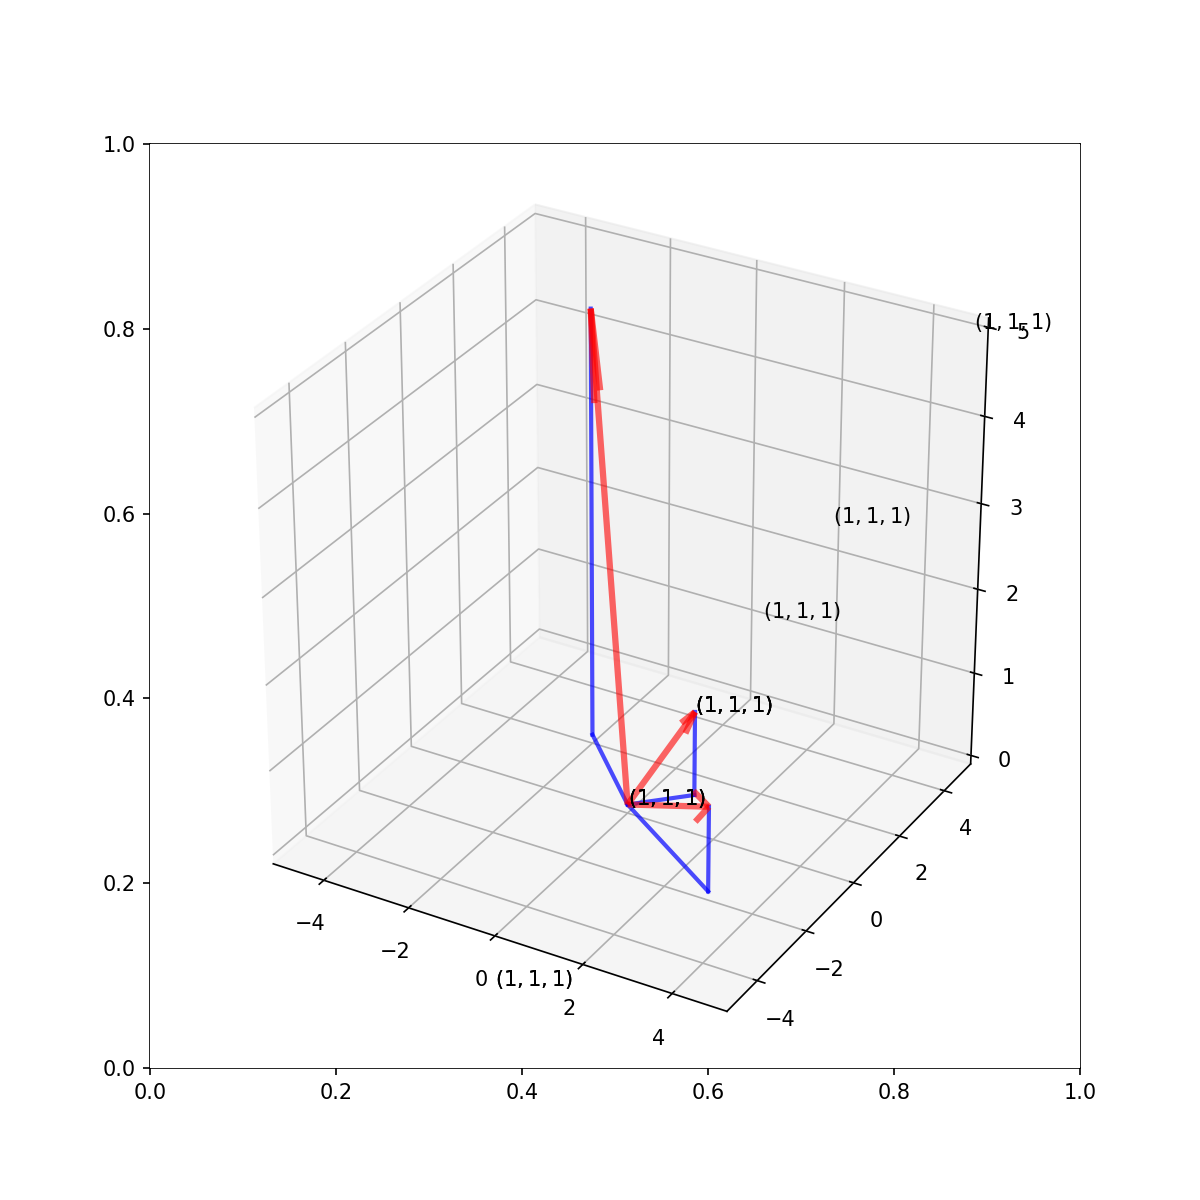

In [8]:
fig, ax = plt.subplots(figsize = (8, 8))
ax = fig.gca(projection='3d')

vec = np.array([[0, 0, 0, 1, 1, 1], 
                [0, 0, 0, -2, 2, 5], 
                [0, 0, 0, 3, -2, 1]])
X, Y, Z, U, V, W = zip(*vec)
ax.quiver(X, Y, Z, U, V, W, length=1, normalize=False, 
          color = 'red', alpha = .6,
          arrow_length_ratio = .18, pivot = 'tail',
          linestyles = 'solid',linewidths = 3)

ax.set_xlim([-5, 5])
ax.set_ylim([-5, 5])
ax.set_zlim([0, 5])

ax.text(1, 1, 1, '$(1, 1, 1)$')
ax.text(-2, 2, 5, '$(-2, 2, 5)$')
ax.text(3, -2, 1, '$(3, -2, 1)$')
ax.text(0, 0, 0, '$(0, 0, 0)$')

points = np.array([[[1, 1, 1], [1, 1, 0]], 
                  [[0, 0, 0], [1, 1, 0]], 
                  [[3, -2, 1],[3, -2, 0]],
                  [[0, 0, 0],[3, -2, 0]],
                  [[-2, 2, 5],[-2, 2, 0]],
                  [[0, 0, 0],[-2, 2, 0]]])

for i in range(points.shape[0]): # loop through the 3rd axis
    X, Y, Z = zip(*points[i,:,:])
    ax.plot(X,Y,Z,lw = 2, color = 'b', alpha = 0.7)
ax.grid()

# <font face="gotham" color="purple"> Vector Addition, Subtraction And Scalar Multiplication

The vector addition is element-wise operation, if we have vectors $\mathbf{u}$ and $\mathbf{v}$ addition:

$$\mathbf{u}+\mathbf{v}=\left[\begin{array}{c}
u_{1} \\
u_{2} \\
\vdots \\
u_{n}
\end{array}\right]+\left[\begin{array}{c}
v_{1} \\
v_{2} \\
\vdots \\
v_{n}
\end{array}\right]=\left[\begin{array}{c}
u_{1}+v_{1} \\
u_{2}+v_{2} \\
\vdots \\
u_{n}+v_{n}
\end{array}\right]$$

And subtraction:
$$\mathbf{u}+(-\mathbf{v})=\left[\begin{array}{c}
u_{1} \\
u_{2} \\
\vdots \\
u_{n}
\end{array}\right]+\left[\begin{array}{c}
-v_{1} \\
-v_{2} \\
\vdots \\
-v_{n}
\end{array}\right]=\left[\begin{array}{c}
u_{1}-v_{1} \\
u_{2}-v_{2} \\
\vdots \\
u_{n}-v_{n}
\end{array}\right]$$

And the scalar operations:
$$c \mathbf{u}=c\left[\begin{array}{c}
u_{1} \\
u_{2} \\
\vdots \\
u_{n}
\end{array}\right]=\left[\begin{array}{c}
c u_{1} \\
c u_{2} \\
\vdots \\
c u_{n}
\end{array}\right]$$

Let's demonstrate both in $\mathbb{R}^2$ and $\mathbb{R}^3$.

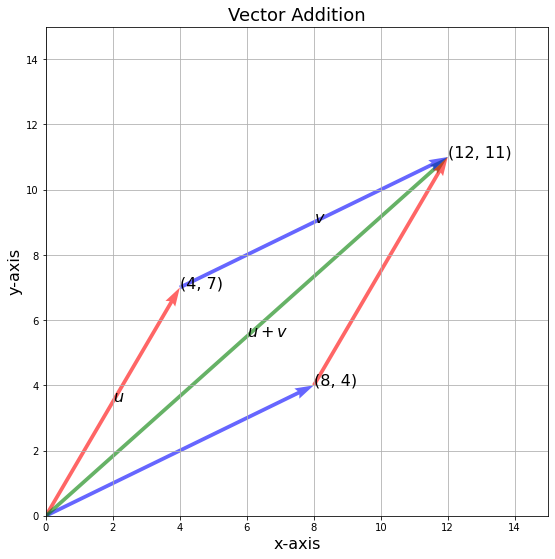

In [21]:
fig, ax = plt.subplots(figsize = (9,9))

vec = np.array([[[0, 0, 4, 7]],
               [[0, 0, 8, 4]],
               [[0, 0, 12, 11]],
               [[4, 7, 8, 4]],
               [[8, 4, 4, 7]]])
color = ['r','b','g','b','r']

for i in range(vec.shape[0]):
    X,Y,U,V = zip(*vec[i,:,:])
    ax.quiver(X, Y, U, V, angles='xy', scale_units='xy', color = color[i], scale=1, alpha = .6)

ax.set_xlim([0, 15])
ax.set_ylim([0, 15])
ax.set_xlabel('x-axis', fontsize =16)
ax.set_ylabel('y-axis', fontsize =16)
ax.grid()

for i in range(3):
    ax.text(x = vec[i,0,2], y = vec[i,0,3], s = '(%.0d, %.0d)' %(vec[i,0,2],vec[i,0,3]), fontsize = 16)

ax.text(x= vec[0,0,2]/2, y = vec[0,0,3]/2, s= '$u$', fontsize = 16)
ax.text(x= 8, y = 9, s= '$v$', fontsize = 16)
ax.text(x= 6, y = 5.5, s= '$u+v$', fontsize = 16)

ax.set_title('Vector Addition', size = 18)
plt.show()

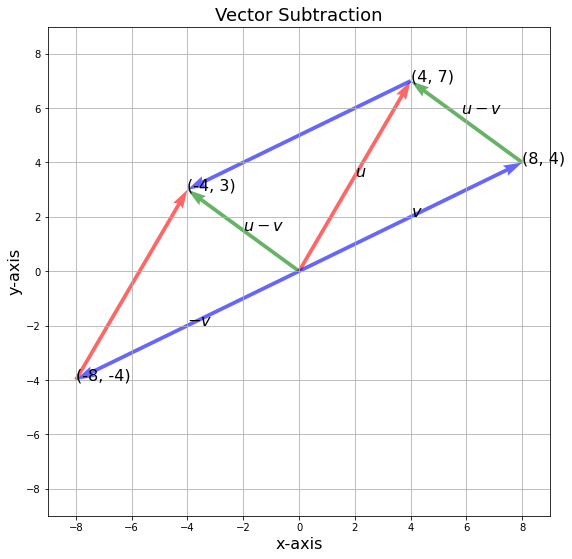

In [28]:
fig, ax = plt.subplots(figsize=(9, 9))

vec = np.array([[[0, 0, 4, 7]],
               [[0, 0, 8, 4]],
               [[0, 0, -8, -4]],
               [[0, 0, -4, 3]],
               [[-8, -4, 4, 7]],
               [[4, 7, -8, -4]],
               [[8, 4, -4, 3]]])
color = ['r','b','b','g','r','b','g']

for i in range(vec.shape[0]):
    X,Y,U,V = zip(*vec[i,:,:])
    ax.quiver(X, Y, U, V, angles='xy', scale_units='xy', color = color[i], scale=1, alpha = .6)

for i in range(4):
    ax.text(x = vec[i,0,2], y = vec[i,0,3], s = '(%.0d, %.0d)' %(vec[i,0,2],vec[i,0,3]), fontsize = 16)

s = ['$u$','$v$','$-v$','$u-v$']
for i in range(4):
    ax.text(x = vec[i,0, 2]/2, y = vec[i,0, 3]/2, s = s[i], fontsize = 16)
ax.text(x= 5.8 , y = 5.8, s= '$u-v$', fontsize = 16)

ax.set_xlim([-9, 9])
ax.set_ylim([-9, 9])
ax.set_xlabel('x-axis', fontsize =16)
ax.set_ylabel('y-axis', fontsize =16)
ax.grid()
ax.set_title('Vector Subtraction', size = 18)
plt.show()

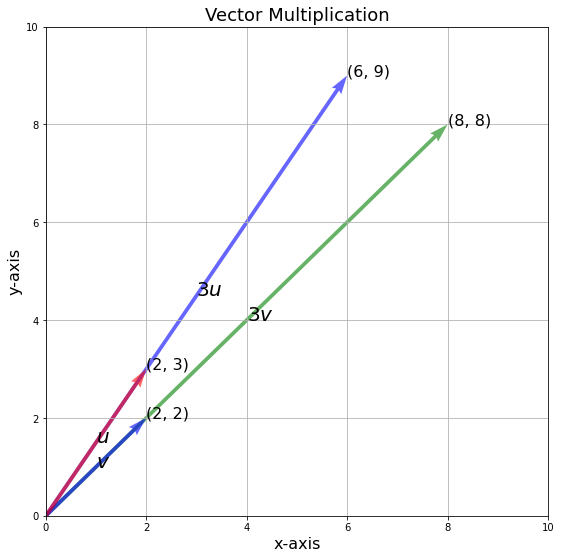

In [44]:
fig, ax = plt.subplots(figsize=(9, 9))

vec = np.array([[[0, 0, 2, 3]],
               [[0, 0, 6, 9]],
               [[0, 0, 2, 2]],
               [[0, 0, 8, 8]]])
colors = ['r','b', 'r', 'b']

for i in range(vec.shape[0]):
    X,Y,U,V = zip(*vec[i,:,:])
    ax.quiver(X, Y, U, V, angles='xy', scale_units='xy', 
              color = color[i], scale=1, alpha = .6, zorder = -i)

s = ['$u$', '$3u$', '$v$', '$3v$']  
for i in range(vec.shape[0]):
    ax.text(x = vec[i,0, 2], y = vec[i, 0, 3], 
            s = '(%.0d, %.0d)' %(vec[i,0, 2], vec[i,0, 3]), fontsize = 16)
    ax.text(x = vec[i,0, 2]/2, y = vec[i,0, 3]/2, 
            s = s[i], fontsize = 20)


ax.set_xlim([0, 10])
ax.set_ylim([0, 10])
ax.set_xlabel('x-axis', fontsize =16)
ax.set_ylabel('y-axis', fontsize =16)
ax.grid()

ax.set_title('Vector Multiplication', size = 18)
plt.show()

Now let's challenge ourselves for plotting in 3D.

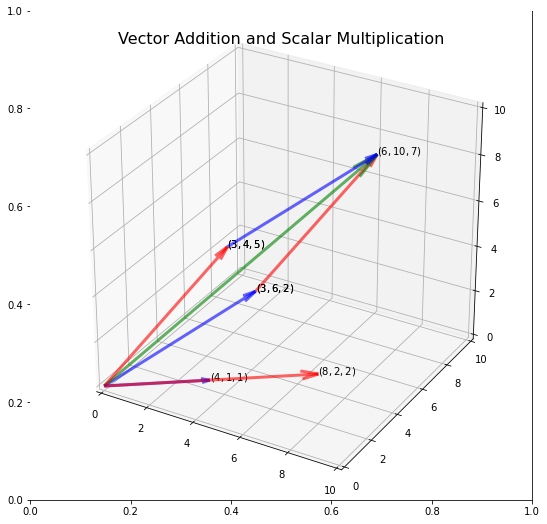

In [52]:
fig, ax = plt.subplots(figsize = (9, 9))
ax = fig.gca(projection='3d')

############################## Arrows and Texts #####################################

vec = np.array([[[0, 0, 0, 3, 4, 5]],
               [[0, 0, 0, 3, 6, 2]],
               [[0, 0, 0, 6, 10, 7]],
               [[3, 4, 5, 3, 6, 2]],
               [[3, 6, 2, 3, 4, 5]],
               [[0, 0, 0, 8, 2, 2]],
               [[0, 0, 0, 4, 1, 1]]])
colors = ['r','b','g','b','r','r','b'] 

for i in range(vec.shape[0]):
    X,Y,Z, U,V,W = zip(*vec[i,:,:])
    ax.quiver(X, Y, Z, U, V, W, length=1, normalize=False, 
              color = colors[i], alpha = .6,arrow_length_ratio = .08, pivot = 'tail',
              linestyles = 'solid',linewidths = 3)
    ax.text(x = vec[i, 0, 3], y = vec[i, 0, 4], z= vec[i, 0, 5], 
            s = '$(%.0d, %.0d, %.0d)$'%(vec[i, 0, 3],vec[i, 0, 4],vec[i, 0, 5]))
    
############################## Axis #####################################
ax.grid()
ax.set_xlim([0, 10])
ax.set_ylim([0, 10])
ax.set_zlim([0, 10])
ax.set_title('Vector Addition and Scalar Multiplication', size = 16)
plt.show()

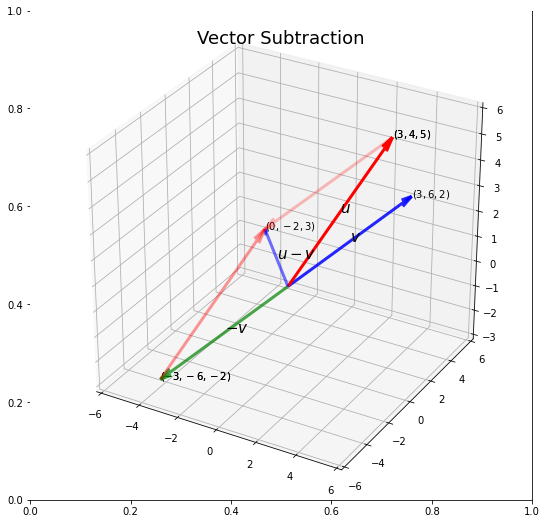

In [64]:
fig, ax = plt.subplots(figsize = (9, 9))
ax = fig.gca(projection='3d')

############################## Arrows and Texts #####################################

vec = np.array([[[0, 0, 0, 3, 4, 5]],
               [[0, 0, 0, 3, 6, 2]],
               [[0, 0, 0, -3, -6, -2]],
               [[0, 0, 0, 0, -2, 3]],
               [[-3, -6, -2, 3, 4, 5]],
               [[3, 4, 5, -3, -6, -2]]])
for i in range(vec.shape[0]):
    X,Y,Z, U,V,W = zip(*vec[i,:,:])
    ax.quiver(X, Y, Z, U, V, W, length=1, normalize=False, 
              color = colors[i],arrow_length_ratio = .08, pivot = 'tail',
              linestyles = 'solid',linewidths = 3, alpha = 1 - .15*i)
    ax.text(x = vec[i, 0, 3], y = vec[i, 0, 4], z= vec[i, 0, 5], 
            s = '$(%.0d, %.0d, %.0d)$'%(vec[i, 0, 3],vec[i, 0, 4],vec[i, 0, 5]))

s = ['$u$','$v$', '$-v$','$u-v$']
for i in range(4):
    ax.text(x = vec[i,0, 3]/2, y = vec[i,0, 4]/2, z= vec[i,0, 5]/2, 
            s = s[i], size = 15, zorder = i+vec.shape[0])
    
############################## Axis #####################################

ax.grid()
ax.set_xlim([-6, 6])
ax.set_ylim([-6, 6])
ax.set_zlim([-3, 6])

ax.set_title('Vector Subtraction', size = 18)
plt.show()